# What Makes an App Profitable


The goal of this project is to determine what makes a successful and profitable app.This information can help developers create apps through data driven descisions. We will be looking at apps from the App store and Google Play Store. Like what attributes atracts more users. As of 2019, there are over 4 million apps collectilly on the App store and Google Play Store [(Source)](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/). Since analyzing all this daa data will take a consierable amount of time, we will be looking at a sample of the data.

The following dataset were used.
* [A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing approximately ten thousand apps from the Google Play Store.
* [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing approximately ten thousand apps from the App Store.

## 1. Opening the datasets

Before we begin, let's import all the functions and modules we'll be using.

We will be using the pandas module to read the csv files and the display function in order for the data to be read easily.

In [1]:
import pandas as pd
from IPython.display import display #cell 2
from numpy import nan #cell 14: Python does not have a built-in name nan, so import from numpy or define it

In [2]:
ios_data = pd.read_csv('AppleStore.csv')
android_data = pd.read_csv('googleplaystore.csv')

In [3]:
#display the first five rows
display(ios_data.head(5))

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
display(android_data.head(5))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


To maker it easier to explore both sets of data, we'll create a function called data_info which takes a csv file as an input, how many rows of data you want to see spfecied by the start and end inputs. it also gives you the option of seeing the dimensions of the dataset.

In [5]:
def data_info(csv_file,start,end,dim_display = False):   
    import pandas as pd
    from IPython.display import display #cell 2
    dataset = pd.read_csv(csv_file)
                          
    if dim_display:
        print(f'Number of rows: {dataset.shape[0]}    Number of columns: {dataset.shape[1]}')
        print(display(dataset[start:end]))

In [6]:
data_info('googleplaystore.csv',1,6,True)

Number of rows: 10841    Number of columns: 13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


None


From the information above we can see that this dataset has 10,841 Google Play apps. Columns such as 'Apps', 'Category', 'Rating, 'Type', 'Price' 'Content_Rating' and 'Genres' will be useful for our analysis.

In [7]:
data_info('AppleStore.csv',1,6,True)

Number of rows: 7197    Number of columns: 16


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1


None


The 'AppleStore.csv' contains 7,197 Apps. Some of the useful columns will be 'id', 'track_name', 'currency', 'price', 'rating_count_tot' and 'prime_genre'. Some of the columns aren't self explanitory. A documentation outlining the details can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## 2. Cleaning the Data

In this section of the project, we will be removing inncurate data an duplicates. We will also be removing non-English apps because that is beyong our scope of knowledge and as well as removing apps that are not free.

### 2.1 Incorrect data 
The disscusion section of the Google Play Store data states that entry 10472 has an error. Let's what this error is and what we can do to fix it.

In [8]:
print(display(android_data.loc[[10472,1]]))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


None


Comparing entry 10472 and 1, we see that for 10472 all the entries have been shifted over by one column to the left. By doing a simple search on the Google Play Store, we can see that the category this app falls under is 'Lifestyle'. 

In the next few code lines below I, found the data type for each column, found every unique category. We can see that the category 'LIFESTYLE' has the genre 'lifestyle'.

In [9]:
for i in range(13):
    j = type(android_data.iloc[1,i])
    print(j)

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
android_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
android_data.loc[android_data['Category'] == 'LIFESTYLE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1562,Dollhouse Decorating Games,LIFESTYLE,4.1,18968,32M,"5,000,000+",Free,0,Teen,Lifestyle,"April 26, 2018",5.1,4.1 and up
1563,metroZONE,LIFESTYLE,4.1,47497,34M,"10,000,000+",Free,0,Everyone,Lifestyle,"June 8, 2018",5.3.0.54.7,5.0 and up
1564,Easy Hair Style Design,LIFESTYLE,4.3,601,5.1M,"100,000+",Free,0,Everyone,Lifestyle,"December 20, 2017",1.0,2.3 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1566,"Black Wallpaper, AMOLED, Dark Background: Darkify",LIFESTYLE,4.6,51357,80M,"5,000,000+",Free,0,Everyone,Lifestyle,"July 31, 2018",8.0,4.0 and up
1567,Girly Wallpapers Backgrounds,LIFESTYLE,4.4,13565,3.3M,"1,000,000+",Free,0,Everyone,Lifestyle,"August 5, 2018",2.5,4.0 and up
1568,Chart - Myanmar Keyboard,LIFESTYLE,4.4,39364,28M,"5,000,000+",Free,0,Everyone,Lifestyle,"July 17, 2018",10.19,4.0.3 and up
1569,Easy Makeup Tutorials,LIFESTYLE,4.3,7287,5.0M,"1,000,000+",Free,0,Everyone,Lifestyle,"November 3, 2016",1.0,2.3 and up
1570,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11M,"10,000,000+",Free,0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
1571,Entel,LIFESTYLE,3.2,16168,55M,"1,000,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",2.2.9,4.0.3 and up


In the code below, I shift the column by one to the left using the replace function.

In [12]:
android_data['Category'] = android_data['Category'].replace('1.9','LIFESTYLE')
android_data['Rating'] = android_data['Rating'].replace(19.0,1.9)
android_data['Reviews'] = android_data['Reviews'].replace('3.0M','19.0')
android_data['Size'] = android_data['Size'].replace('1,000+','3.0M')
android_data['Installs'] = android_data['Installs'].replace('Free','1,000+')
android_data['Type'] = android_data['Type'].replace('0','Free')
android_data['Price'] = android_data['Price'].replace('Everyone','0')
android_data['Content Rating'] = android_data['Content Rating'].replace(nan,'Everyone')
android_data['Genres'] = android_data['Genres'].replace('February 11, 2018','Lifestyle')
android_data['Last Updated'] = android_data['Last Updated'].replace('1.0.19','February 11, 2018')
android_data['Current Ver'] = android_data['Current Ver'].replace('4.0 and up','1.0.19')
android_data['Android Ver'] = android_data['Android Ver'].replace(nan,'4.0 and up')

In [13]:
#check
print(display(android_data.loc[[10472,1]]))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


None


## 2.1 Duplicate Apps

To check for duplicated apps, we create an empty dictionary. Use a `For` loop and `iterrows()` function to loop over android_data dataframe. This code gives us the number of times each app appears. But we don't need to know in such detail. Just which apps are duplicated.

In [14]:
apps = {}

for index, row in android_data.iterrows():
    app_name = row['App']
    if app_name in apps:
        apps[app_name] += 1
    else:
        apps[app_name] = 1
        
num_of_apps = pd.DataFrame.from_dict(apps,orient='index',columns=['App Count']) #in dataframe form for ease of readiability

print(num_of_apps)

                                                    App Count
Photo Editor & Candy Camera & Grid & ScrapBook              1
Coloring book moana                                         2
U Launcher Lite – FREE Live Cool Themes, Hide Apps          1
Sketch - Draw & Paint                                       1
Pixel Draw - Number Art Coloring Book                       1
Paper flowers instructions                                  1
Smoke Effect Photo Maker - Smoke Editor                     1
Infinite Painter                                            1
Garden Coloring Book                                        1
Kids Paint Free - Drawing Fun                               1
Text on Photo - Fonteee                                     1
Name Art Photo Editor - Focus n Filters                     1
Tattoo Name On My Photo Editor                              1
Mandala Coloring Book                                       1
3D Color Pixel by Number - Sandbox Art Coloring             1
Learn To

According to the information below, there are 798 cases of repeated apps.

In [15]:
count_list = []

for i in range(9660):
    j = num_of_apps.iloc[i][0]
    if j >= 2:
        count_list.append(num_of_apps.iloc[i])

print(len(count_list))
print(count_list[:15])

798
[App Count    2
Name: Coloring book moana, dtype: int64, App Count    2
Name: Mcqueen Coloring pages, dtype: int64, App Count    2
Name: UNICORN - Color By Number & Pixel Art Coloring, dtype: int64, App Count    2
Name: Textgram - write on photos, dtype: int64, App Count    2
Name: Wattpad 📖 Free Books, dtype: int64, App Count    2
Name: Amazon Kindle, dtype: int64, App Count    2
Name: Dictionary - Merriam-Webster, dtype: int64, App Count    2
Name: NOOK: Read eBooks & Magazines, dtype: int64, App Count    2
Name: Oxford Dictionary of English : Free, dtype: int64, App Count    2
Name: Spanish English Translator, dtype: int64, App Count    2
Name: NOOK App for NOOK Devices, dtype: int64, App Count    2
Name: Ebook Reader, dtype: int64, App Count    2
Name: English Dictionary - Offline, dtype: int64, App Count    2
Name: Docs To Go™ Free Office Suite, dtype: int64, App Count    3
Name: Google My Business, dtype: int64]


In the code below, we create two empty lists, one for duplicate apps and one for unique apps. Using a `for` loop we iterrate through our dataset set, extracting the name of the app from each row. If the name appears more than once, it is added to the list dup. If the name appears only once, it is added to the list uni. Unlike a dictionary, it doesn't count the times a specific app is repeated, it simply adds the name of the repated app into dup, even though there is more than one entry.

In [16]:
dup = []
uni = []

for i in range(10841): 
        name = android_data['App'].values[i]
        if name in uni:
            dup.append(name)
        else:
            uni.append(name)
print(f'Number of repeated apps = {len(dup)}')
print(dup[:15])

Number of repeated apps = 1181
['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


**Below we do the same for the iOS apps.**

In [17]:
dup_ios = []
uni_ios = []

for j in range(7197):
    name = ios_data['track_name'].values[j]
    if name in uni_ios:
        dup_ios.append(name)
    else:
        uni_ios.append(name)
print(f'Number of repeated apps = {len(dup_ios)}')
print(dup_ios)

Number of repeated apps = 2
['Mannequin Challenge', 'VR Roller Coaster']


As we can see from the information, ios_data has signifcantly less duplicated apps. This cut out the amount work we have to do to clean both datasets. We will still, manipulate the ios_data as we do the android_data for consistancy.

According to the code below, it is obeserved that Instagram appears four times in android_data. Below we print all apps with the name Instagram and compare their app information. We see that all of the information is the same expect for the number of reviews. The higher the number of reviews, the more recent the data should be and reliable it will be.

In [18]:
for index, row in android_data.iterrows():
    app_name = row['App']
    if app_name == 'Instagram':
        print(row)
        print('\n')

App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577313
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2545, dtype: object


App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2604

## 2.2 Duplicate Apps: Part 2

We start by creating a empty dictionary which loops over the android_data dataset and stores every unique app as a key and the corresponding value as the highest number of reviews for that app.

In [19]:
max_reviews = {}

for i in range(10841): 
        name = android_data['App'].values[i]
        n_reviews = float(android_data['Reviews'].values[i])
    
        if name in max_reviews and max_reviews[name] < n_reviews: #current value in dictionary is less than n_reviews
            max_reviews[name] = n_reviews
    
        elif name not in max_reviews:
            max_reviews[name] = n_reviews

In [20]:
max_reviews['Instagram'] #checks out

66577446.0

In [21]:
print('Expected length:', len(android_data) - 1181)
print('Actual length:', len(max_reviews))

Expected length: 9660
Actual length: 9660


In [22]:
a_cleaned_list = []
already_added = []    #done to account for duplicate apps with the same number of reviews.

for i in range(10841):
    row = android_data.iloc[i]
    name = android_data.iloc[i][0]
    n_reviews = float(android_data.iloc[i][3])
        
    if (max_reviews[name] == n_reviews) and (name not in already_added):
        a_cleaned_list.append(row) 
        already_added.append(name)
        
android_cleaned = pd.DataFrame(a_cleaned_list,columns=['App','Category','Rating','Reviews','Size','Installs','Type','Price',
                                                       'Content Rating','Genres','Last Updated','Current Ver','Android Ver']).reset_index(drop=True)

In [23]:
android_cleaned

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
5,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
6,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
7,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
8,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
9,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


**Let's find the maximum reviews for all the iOS apps. As well as create a new dataframe that stores non-repeated with the highest amount of reviews.**

In [24]:
max_reviews_ios = {}

for i in range(len(ios_data)): 
        name = ios_data['track_name'].values[i]
        n_reviews = float(ios_data['rating_count_ver'].values[i]) #user ratings for current version
    
        if name in max_reviews_ios and max_reviews_ios[name] < n_reviews: #current value in dictionary is less than n_reviews
            max_reviews_ios[name] = n_reviews
    
        elif name not in max_reviews_ios:
            max_reviews_ios[name] = n_reviews

In [25]:
print('Expected length:', len(ios_data) - 2)
print('Actual length:', len(max_reviews_ios))

Expected length: 7195
Actual length: 7195


In [26]:
i_cleaned_list = []
already_added_ios = []

for i in range(len(ios_data)):
    row = ios_data.iloc[i]
    name = ios_data.iloc[i][1]
    n_reviews = float(ios_data.iloc[i][6])
        
    if (max_reviews_ios[name] == n_reviews) and (name not in already_added_ios):
        i_cleaned_list.append(row) 
        already_added_ios.append(name)
        
ios_cleaned = pd.DataFrame(i_cleaned_list,columns=['id','track_name','size_bytes','currency','price','rating_count_tot',
                                                       'rating_count_ver','user_rating','user_rating_ver','ver','cont_rating',
                                                       'prime_genre','sup_devices.num','ipadSc_urls.num','lang.num',
                                                      'vpp_lic']).reset_index(drop=True)

In [27]:
len(ios_cleaned)

7195

# 3. Removing Non-English Apps

## 3.1 Part One 

As we having been exploring this Android apps, there are apps which are non-English. Shown below are two examples:

In [28]:
print(android_cleaned.iloc[4412][0])
print(android_cleaned.iloc[7940][0])

print(ios_cleaned.iloc[813][1])
print(ios_cleaned.iloc[6731][1])

中国語 AQリスニング
لعبة تقدر تربح DZ
爱奇艺PPS -《欢乐颂2》电视剧热播
激ムズ！和のひとふで書き！ 〜頭をつかう脳トレパズルゲーム〜


As this is out of our realm, we need to filter these types of apps out from our dataset. All English text, including letters from A to Z, numerical digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.), are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it. If the character exceeds 127, we will know it is a non-English character.

Below we built a function that takes in a string of characters. Using the built-in function ord(), it will find the corresponding encoding number for each character of the string.

In [30]:
def is_eng(string):
    
    for character in string:
        if ord(character) > 127:
            return False 
    return True 
    
print(is_eng('Instagram'))
print(is_eng('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


The function is working fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [31]:
print(is_eng('Docs To Go™ Free Office Suite'))
print(ord('™'))
print(is_eng('Instachat 😜'))
print(ord('😜'))

False
8482
False
128540


## 3.2 Part Two

To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters.
Here we modify the `is_english` function by:

* Create a varaible named 'non_ascii' which keeps counts of the number of non ASCII codes.
* The character of each character is counted using the ord(), if the number is more than 127,the value in non_ascii increases by one.
* If non_ascii exceeds three, the function returns False.
* If it's below three, the function returns True.

In [32]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii +=1
            
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


Below we create a new empty list called `a_eng_list` to store all English apps from the android_cleaned dataframe. Using a for loop we loop through the data isloating the name of the app from the `App` column. Passing the name to the `is_english` function, if it returns True, the app is added to the new list. If Flase, it is not.

In [33]:
a_eng_list = []

for i in range(len(android_cleaned)):
    row = android_cleaned.iloc[i]
    name = android_cleaned.iloc[i][0]
    if is_english(name):
        a_eng_list.append(row)

android_english = pd.DataFrame(a_eng_list,columns=['App','Category','Rating','Reviews','Size','Installs','Type','Price',
                                                       'Content Rating','Genres','Last Updated','Current Ver','Android Ver']).reset_index(drop=True)

print(f'Number of rows = {len(android_english)}')

Number of rows = 9615


**Filterting English only apps from ios_cleaned.**

In [34]:
i_eng_list = []

for j in range(len(ios_cleaned)):
    row = ios_cleaned.iloc[j]
    name = ios_cleaned.iloc[j][1]
    if is_english(name):
        i_eng_list.append(row)

ios_english = pd.DataFrame(i_eng_list,columns=['id','track_name','size_bytes','currency','price','rating_count_tot',
                                                       'rating_count_ver','user_rating','user_rating_ver','ver','cont_rating',
                                                       'prime_genre','sup_devices.num','ipadSc_urls.num','lang.num',
                                                      'vpp_lic']).reset_index(drop=True)
print(f'Number of rows = {len(ios_english)}')

Number of rows = 6181


## 3.3 Isolating Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [35]:
type(ios_english.iloc[0][4])

numpy.float64

In [36]:
a_free = []
i_free = []

for i in range(9615):
    row = android_english.iloc[i]
    price = android_english.iloc[i][7]
    
    if price == '0':
        a_free.append(row)
        
for j in range(len(ios_english)):
    row = ios_english.iloc[j]
    price = ios_english.iloc[j][4]
    
    if price == 0.0:
        i_free.append(row)
        
android_final = pd.DataFrame(a_free,columns=['App','Category','Rating','Reviews','Size','Installs','Type','Price',
                                            'Content Rating','Genres','Last Updated','Current Ver','Android Ver']).reset_index(drop=True)

ios_final = pd.DataFrame(i_free,columns=['id','track_name','size_bytes','currency','price','rating_count_tot',
                                                       'rating_count_ver','user_rating','user_rating_ver','ver','cont_rating',
                                                       'prime_genre','sup_devices.num','ipadSc_urls.num','lang.num',
                                                      'vpp_lic']).reset_index(drop=True)

print(f'Number of rows = {len(android_final)}')
print(f'Number of rows = {len(ios_final)}')

Number of rows = 8865
Number of rows = 3220


## 4. Most Common Apps by Genre

### 4.1 Part One

As mentioned in the introduction of this project, our aim is to determine what kinds of apps attract the most most users since our revenue is highly related to the number of users.

Our end goal is to create an app suitable on both the Google Play Store and on the App Store, so we need to find an app that is profitable on both platforms.

Let's begin the analysis by finding the most common genre of apps for each platform. We start by creating a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

### 4.2 Part Two

We start by building two functions so we can analyze the frequency tables:

* One function to generate frequency tables that show percentages.
* Another function that we can use to display the percentages in a descending order.

In [37]:
def freq_table(dataset,index):
    table = {}
    total_apps = 0
    
    for i in range(len(dataset)):
        total_apps +=1
        value = dataset.iloc[i][index]
        
        if value in table:
            table[value] +=1
        else:
            table[value] = 1
            
    table_percentage = {}                   #finding proportionalities for each genre type, the key is the genre and table[key]
    for key in table:                       #is table[value] == table[key]
        percentage = (table[key]/total_apps) * 100
        table_percentage[key] = percentage
        
    return table_percentage

def display_table(dataset,index):    #Taking key and value pairs from freq_table and appending them to a list 
    table = freq_table(dataset,index)
    table_display = []
    for key in table:
        key_value_tuple = (table[key], key)    #Not as (key, table[key]) because the sorted function will sort alphabetically
        table_display.append(key_value_tuple)  #since key is first in (key, table[key]) pair, that's they are switched here
        
    table_sorted = sorted(table_display,reverse=True)
    for entry in table_sorted:
        print(f'{entry[1]} : {entry[0]}')

## 4.3 Part Two

We start the analysis by examining the `Prime Genre` column for the `ios_final` dataframe, it is the 11th column or -5th column.

In [38]:
display_table(ios_final, -5)

Games : 58.13664596273293
Entertainment : 7.888198757763975
Photo & Video : 4.968944099378882
Education : 3.6645962732919255
Social Networking : 3.291925465838509
Shopping : 2.608695652173913
Utilities : 2.515527950310559
Sports : 2.142857142857143
Music : 2.049689440993789
Health & Fitness : 2.018633540372671
Productivity : 1.7391304347826086
Lifestyle : 1.5838509316770186
News : 1.3354037267080745
Travel : 1.2422360248447204
Finance : 1.1180124223602486
Weather : 0.8695652173913043
Food & Drink : 0.8074534161490683
Reference : 0.5590062111801243
Business : 0.5279503105590062
Book : 0.43478260869565216
Navigation : 0.18633540372670807
Medical : 0.18633540372670807
Catalogs : 0.12422360248447205


We can see that more than 50% of the free English apps in the App store consists of games. Followed by entertainment apps coming in at approximately 8% and photo and video apps consisting of about 5% of all the apps. Only 3.6% of the apps are for educational purposes and 3.3% for social networking.

The top five app genre are games, entertainment and photo & video, education and social newtworking. All five of these apps can be labelled as fun and leisure apps. While apps for practical purposes (education, shopping, utilities, health & fitness) are not as apparent. However, just because most of the apps in the App Store are aimmed for leisure and fun, doesn't mean it has thte most amount of users.

Let us look the genres of the apps available in the Google Play Store. In our data, there are two columns that describe the genre of the that. They are `Category` and `Genres`.

In [39]:
#Category
display_table(android_final, 1)

FAMILY : 18.905809362662154
GAME : 9.723632261703328
TOOLS : 8.460236886632826
BUSINESS : 4.591088550479413
LIFESTYLE : 3.914269599548787
PRODUCTIVITY : 3.8917089678511
FINANCE : 3.699943598420756
MEDICAL : 3.5307388606880994
SPORTS : 3.395375070501974
PERSONALIZATION : 3.3164128595600673
COMMUNICATION : 3.2374506486181613
HEALTH_AND_FITNESS : 3.0795262267343486
PHOTOGRAPHY : 2.9441624365482233
NEWS_AND_MAGAZINES : 2.7975183305132543
SOCIAL : 2.662154540327129
TRAVEL_AND_LOCAL : 2.33502538071066
SHOPPING : 2.2447828539199097
BOOKS_AND_REFERENCE : 2.143260011280316
DATING : 1.8612521150592216
VIDEO_PLAYERS : 1.793570219966159
MAPS_AND_NAVIGATION : 1.3987591652566271
FOOD_AND_DRINK : 1.2408347433728144
EDUCATION : 1.161872532430908
ENTERTAINMENT : 0.9588268471517203
LIBRARIES_AND_DEMO : 0.9362662154540328
AUTO_AND_VEHICLES : 0.924985899605189
HOUSE_AND_HOME : 0.8234630569655951
WEATHER : 0.8009024252679076
EVENTS : 0.7106598984771574
PARENTING : 0.6542583192329385
ART_AND_DESIGN : 0.6429

From the information above, we can see that the top 5 app genres for free English apps on the Google Play Store are family, game, tools, business and lifestyle. Compared to the App Store, majority of the Google Play apps are desgined for pratical purposes.

However, if we search the Google Play Store by the family category, most of the apps are games for kids. As seen in the image below.

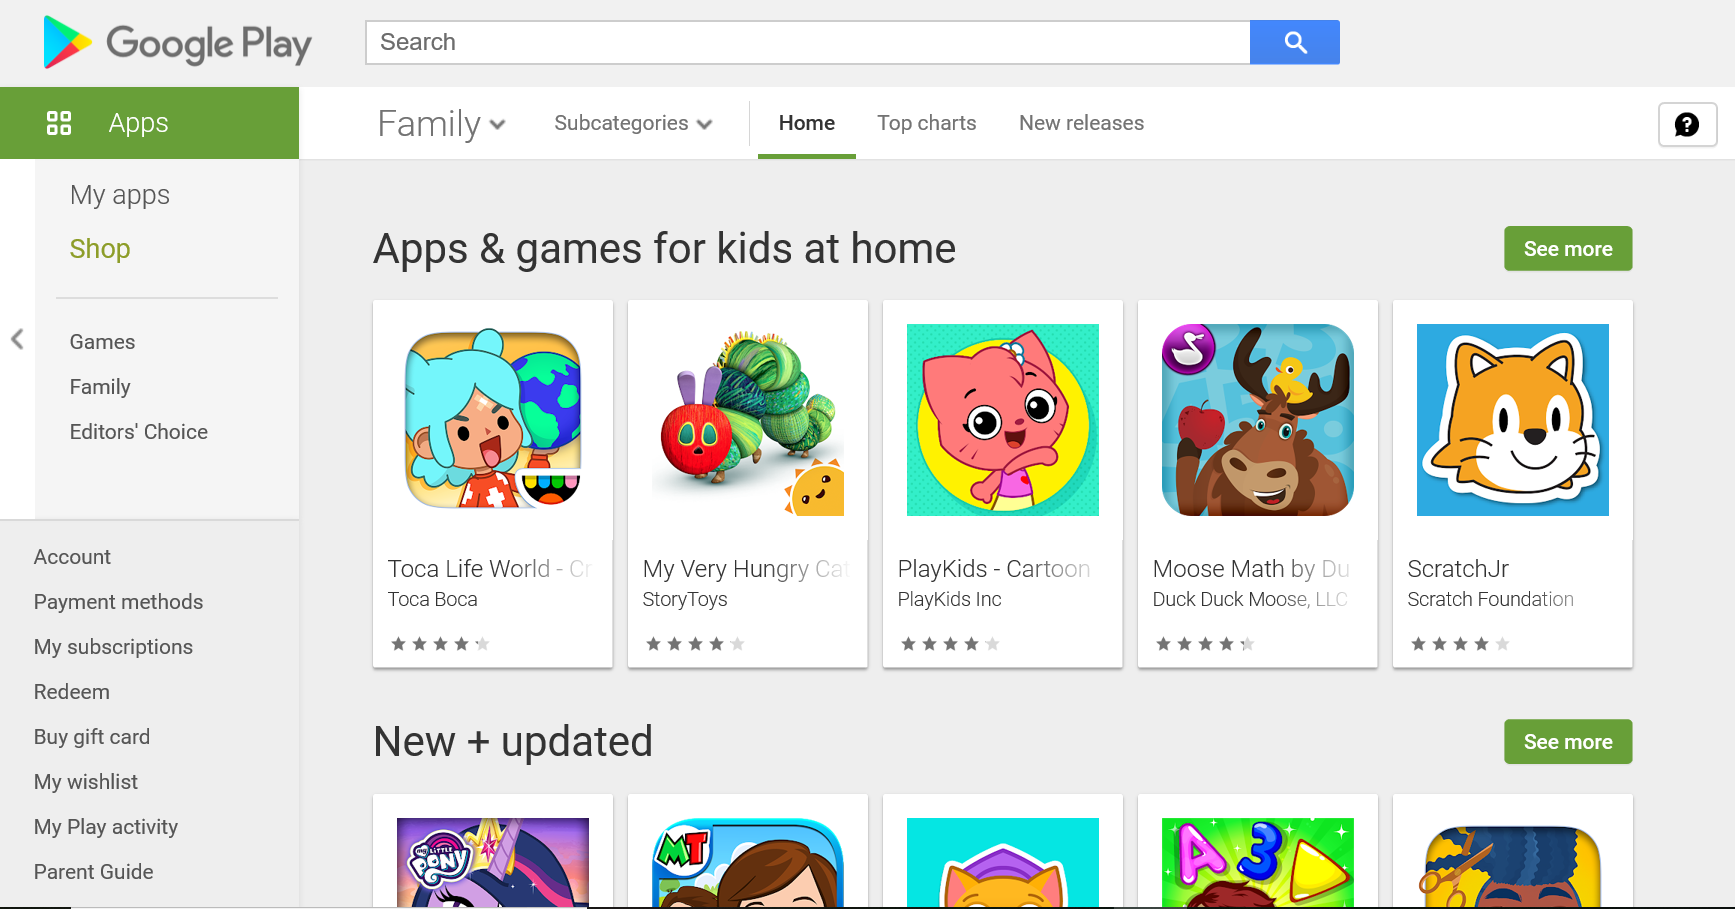

This is also confirmed by the frequency table populated by the genres column.

In [40]:
#Genres
display_table(android_final, -4)

Tools : 8.44895657078398
Entertainment : 6.068809926677947
Education : 5.346869712351946
Business : 4.591088550479413
Lifestyle : 3.902989283699944
Productivity : 3.8917089678511
Finance : 3.699943598420756
Medical : 3.5307388606880994
Sports : 3.4630569655950363
Personalization : 3.3164128595600673
Communication : 3.2374506486181613
Action : 3.102086858432036
Health & Fitness : 3.0795262267343486
Photography : 2.9441624365482233
News & Magazines : 2.7975183305132543
Social : 2.662154540327129
Travel & Local : 2.323745064861816
Shopping : 2.2447828539199097
Books & Reference : 2.143260011280316
Simulation : 2.0417371686407217
Dating : 1.8612521150592216
Arcade : 1.849971799210378
Video Players & Editors : 1.7710095882684715
Casual : 1.7597292724196276
Maps & Navigation : 1.3987591652566271
Food & Drink : 1.2408347433728144
Puzzle : 1.1280315848843767
Racing : 0.9926677946982515
Role Playing : 0.9362662154540328
Libraries & Demo : 0.9362662154540328
Auto & Vehicles : 0.924985899605189
S

We can see that the top five app genres are tools, entertainment, education, business and lifestyle. The Google Play Store has a good balance between fun & leisure and pratical apps.

Both the `Category` and `Genres` columns provid similar information, with the `Genres` columns giving a more detailed break down of the app types. We're only looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

Up till now we know that the App Store has more fun and leisure related games. Whereas the Google Play Store has both fun and pratical apps. Now let's find which apps has the most users.

## 4.4 Most Popular Apps by Genre on the App Store

One way to find which apps are the most popular is to calculate the average number of installs for each app genre. For the Google Play Store data, we can find this information in the `Installs` column. The App Store data does not have this information. So we will be using the data from the `rating_count_tot` column, which is the total number of user ratings.

Below, we calculate the average user ratings for each app according to genre using the `rating_count_tot` column.

In [41]:
genres_ios = freq_table(ios_final, -5)    #Creating frequency table of genre column of ios_final (not sorted)

gen_rating = {}
for genre in genres_ios:    #Zeroing total and len_genre for every genre type for every time the for loop runs
    total = 0
    len_genre = 0
    for i in range(len(ios_final)):    #populating each app genre type in ios_final
        genre_app = ios_final.iloc[i][-5]
        if genre_app == genre:      #if genre from ios_final appears in genres_ios frequency table
            n_ratings = float(ios_final.iloc[i][5])    #extract from 'rating_count_tot' column
            total += n_ratings    #sum up n_ratings
            len_genre +=1         #sum up number of apps in this genre
            avg_n_ratings = total/len_genre    #finding the average
            gen_rating[genre] = avg_n_ratings  #adding key and value to gen_rating dictionary
            
gen_table = []                               #sorting the dictionary from most to least number of users
for key in gen_rating:
    gen_rating_tuple = (gen_rating[key], key)
    gen_table.append(gen_rating_tuple)
gen_sorted = sorted(gen_table, reverse=True)
for entry in gen_sorted:
    print(f'{entry[1]} : {entry[0]}')

Navigation : 86090.33333333333
Reference : 74942.11111111111
Social Networking : 71548.34905660378
Music : 57326.530303030304
Weather : 52279.892857142855
Book : 39758.5
Food & Drink : 33333.92307692308
Finance : 31467.944444444445
Photo & Video : 28441.54375
Travel : 28243.8
Shopping : 26919.690476190477
Health & Fitness : 23298.015384615384
Sports : 23008.898550724636
Games : 22812.92467948718
News : 21248.023255813954
Productivity : 21028.410714285714
Utilities : 18684.456790123455
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Business : 7491.117647058823
Education : 7003.983050847458
Catalogs : 4004.0
Medical : 612.0


The highest average number of user ratings belongs to the navigation genre, with an average of 86,000 reviews. Followed by reference and social networking.

But, this number is heavily influenced by Waze and Google Maps, which have approximately half a million users in total:

In [42]:
for i in range(len(ios_final)):
    app = ios_final.iloc[i][-5]
    if app == 'Navigation':
        print(f'{ios_final.iloc[i][1]} : {ios_final.iloc[i][5]}')

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Shown belown, a similar pattern is exhibited with social networking apps where the average number is heavily influence by a few giants. Such as Facebook, Pinterest, Skype, Messsnger etc.

In [43]:
for i in range(len(ios_final)):
    gen = ios_final.iloc[i][-5]
    if gen == 'Social Networking':
        print(f'{ios_final.iloc[i][1]} : {ios_final.iloc[i][5]}')

Facebook : 2974676
Pinterest : 1061624
Skype for iPhone : 373519
Messenger : 351466
Tumblr : 334293
WhatsApp Messenger : 287589
Kik : 260965
ooVoo – Free Video Call, Text and Voice : 177501
TextNow - Unlimited Text + Calls : 164963
Viber Messenger – Text & Call : 164249
Followers - Social Analytics For Instagram : 112778
MeetMe - Chat and Meet New People : 97072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90414
InsTrack for Instagram - Analytics Plus More : 85535
Tango - Free Video Call, Voice and Chat : 75412
LinkedIn : 71856
Match™ - #1 Dating App. : 60659
Skype for iPad : 60163
POF - Best Dating App for Conversations : 52642
Timehop : 49510
Find My Family, Friends & iPhone - Life360 Locator : 43877
Whisper - Share, Express, Meet : 39819
Hangouts : 36404
LINE PLAY - Your Avatar World : 34677
WeChat : 34584
Badoo - Meet New People, Chat, Socialize. : 34428
Followers + for Instagram - Follower Analytics : 28633
GroupMe : 28260
Marco Polo Video Walkie Talkie : 27662
Miitomo : 2

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have approximately 75,000 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [44]:
for i in range(len(ios_final)):
    gen = ios_final.iloc[i][-5]
    if gen == 'Reference':
        print(f'{ios_final.iloc[i][1]} : {ios_final.iloc[i][5]}')

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Since the bible is a popular, we can create apps about other faiths and reglions. Or take a popular book and turn it into an app with features other than the text itself. Like an audio version, daily quotes or even a built-in dictionary so you won't have to exit the app.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.
* Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.
* Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play Store data.

## 4.5 Most Popular Apps by Genre on Google Play

For the Google Play Store, we do have the `Installs` columns. So, we can get a thorough understanding about which genre is popular. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [45]:
#installs column
display_table(android_final,5)

1,000,000+ : 15.724760293288211
100,000+ : 11.551043429216017
10,000,000+ : 10.547095318668923
10,000+ : 10.197405527354766
1,000+ : 8.403835307388608
100+ : 6.91483361534123
5,000,000+ : 6.824591088550479
500,000+ : 5.561195713479977
50,000+ : 4.771573604060913
5,000+ : 4.512126339537507
10+ : 3.542019176536943
500+ : 3.248730964467005
50,000,000+ : 2.3011844331641287
100,000,000+ : 2.131979695431472
50+ : 1.9176536943034406
5+ : 0.7896221094190639
1+ : 0.5076142131979695
500,000,000+ : 0.2707275803722504
1,000,000,000+ : 0.2256063169768754
0+ : 0.04512126339537507
0 : 0.011280315848843767


One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [46]:
android_cat = freq_table(android_final,1)     #retunrs unsorted dictionary containing proportionalities of categories

avg_installs_cat = {}
for cat in android_cat:                       #zeroing the number of installs and total number of apps for each category
    total = 0
    len_cat = 0
    for i in range(len(android_final)):      #looping through each app category
        cat_app = android_final.iloc[i][1]
        if cat_app == cat:                   # if app category is equal to category of android_cat dictionary
            n_installs = android_final.iloc[i][5]    #convert number of installs to float and replace ',' and '+' with ''
            n_installs = n_installs.replace(',','')
            n_installs = n_installs.replace('+','')
            total += float(n_installs)       #sum up all installs together
            len_cat +=1                      #sum up number of apps in category
    avg_n_installs = total/len_cat           #finding average
    avg_installs_cat[cat] = avg_n_installs
    
    
cat_table = []                               #sorting the dictionary from most to least number of installs
for key in avg_installs_cat:
    avg_cat_tuple = (avg_installs_cat[key], key)
    cat_table.append(avg_cat_tuple)
cat_sorted = sorted(cat_table, reverse=True)
for entry in cat_sorted:
    print(f'{entry[1]} : {entry[0]}')

COMMUNICATION : 38456119.167247385
VIDEO_PLAYERS : 24727872.452830188
SOCIAL : 23253652.127118643
PHOTOGRAPHY : 17840110.40229885
PRODUCTIVITY : 16787331.344927534
GAME : 15588015.603248259
TRAVEL_AND_LOCAL : 13984077.710144928
ENTERTAINMENT : 11640705.88235294
TOOLS : 10801391.298666667
NEWS_AND_MAGAZINES : 9549178.467741935
BOOKS_AND_REFERENCE : 8767811.894736841
SHOPPING : 7036877.311557789
PERSONALIZATION : 5201482.6122448975
WEATHER : 5074486.197183099
HEALTH_AND_FITNESS : 4188821.9853479853
MAPS_AND_NAVIGATION : 4056941.7741935486
FAMILY : 3695641.8198090694
SPORTS : 3638640.1428571427
ART_AND_DESIGN : 1986335.0877192982
FOOD_AND_DRINK : 1924897.7363636363
EDUCATION : 1833495.145631068
BUSINESS : 1712290.1474201474
LIFESTYLE : 1433675.5878962537
FINANCE : 1387692.475609756
HOUSE_AND_HOME : 1331540.5616438356
DATING : 854028.8303030303
COMICS : 817657.2727272727
AUTO_AND_VEHICLES : 647317.8170731707
LIBRARIES_AND_DEMO : 638503.734939759
PARENTING : 542603.6206896552
BEAUTY : 51315

Communication apps have the most number of install on average, with about 39,000,000 installs. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [47]:
for i in range(len(android_final)):
    name = android_final.iloc[i][0]
    app_cat = android_final.iloc[i][1]
    if app_cat == 'COMMUNICATION' and (android_final.iloc[i][5] == '1,000,000,000+'
                                      or android_final.iloc[i][5] == '500,000,000+'
                                      or android_final.iloc[i][5] == '100,000,000+'):
        print(f'{name} : {android_final.iloc[i][5]}')

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all communication apps with 100 million installs, the average is significantly reduced ten times.

In [48]:
under_100_m = []

for i in range(len(android_final)):
    category = android_final.iloc[i][1]
    n_installs = android_final.iloc[i][5]    
    n_installs = n_installs.replace(',','')
    n_installs = n_installs.replace('+','')
    n_installs = float(n_installs)
    if category == 'COMMUNICATION' and (n_installs < 100000000):
        under_100_m.append(n_installs)
        
avg_installs = sum(under_100_m)/len(under_100_m)
print(f'Average number of installs of communication apps under a 100 million: {avg_installs}')

Average number of installs of communication apps under a 100 million: 3603485.3884615386


The same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. Which is shown below:

In [49]:
video_dict = {}

for i in range(len(android_final)):
    name = android_final.iloc[i][0]
    category = android_final.iloc[i][1]
    if category == 'VIDEO_PLAYERS':
        print(f'{name} : {android_final.iloc[i][5]}')

YouTube : 1,000,000,000+
All Video Downloader 2018 : 1,000,000+
Video Downloader : 10,000,000+
HD Video Player : 1,000,000+
Iqiyi (for tablet) : 1,000,000+
Video Player All Format : 10,000,000+
Motorola Gallery : 100,000,000+
Free TV series : 100,000+
Video Player All Format for Android : 500,000+
VLC for Android : 100,000,000+
Code : 10,000,000+
Vote for : 50,000,000+
XX HD Video downloader-Free Video Downloader : 1,000,000+
OBJECTIVE : 1,000,000+
Music - Mp3 Player : 10,000,000+
HD Movie Video Player : 1,000,000+
YouCut - Video Editor & Video Maker, No Watermark : 5,000,000+
Video Editor,Crop Video,Movie Video,Music,Effects : 1,000,000+
YouTube Studio : 10,000,000+
video player for android : 10,000,000+
Vigo Video : 50,000,000+
Google Play Movies & TV : 1,000,000,000+
HTC Service － DLNA : 10,000,000+
VPlayer : 1,000,000+
MiniMovie - Free Video and Slideshow Editor : 50,000,000+
Samsung Video Library : 50,000,000+
OnePlus Gallery : 1,000,000+
LIKE – Magic Video Maker & Community : 50,

The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [50]:
for i in range(len(android_final)):
    category = android_final.iloc[i][1]
    if category == 'BOOKS_AND_REFERENCE':
        print(f'{android_final.iloc[i][0]} : {android_final.iloc[i][5]} ')

E-Book Read - Read Book for free : 50,000+ 
Download free book with green book : 100,000+ 
Wikipedia : 10,000,000+ 
Cool Reader : 10,000,000+ 
Free Panda Radio Music : 100,000+ 
Book store : 1,000,000+ 
FBReader: Favorite Book Reader : 10,000,000+ 
English Grammar Complete Handbook : 500,000+ 
Free Books - Spirit Fanfiction and Stories : 1,000,000+ 
Google Play Books : 1,000,000,000+ 
AlReader -any text book reader : 5,000,000+ 
Offline English Dictionary : 100,000+ 
Offline: English to Tagalog Dictionary : 500,000+ 
FamilySearch Tree : 1,000,000+ 
Cloud of Books : 1,000,000+ 
Recipes of Prophetic Medicine for free : 500,000+ 
ReadEra – free ebook reader : 1,000,000+ 
Anonymous caller detection : 10,000+ 
Ebook Reader : 5,000,000+ 
Litnet - E-books : 100,000+ 
Read books online : 5,000,000+ 
English to Urdu Dictionary : 500,000+ 
eBoox: book reader fb2 epub zip : 1,000,000+ 
English Persian Dictionary : 500,000+ 
Flybook : 500,000+ 
All Maths Formulas : 1,000,000+ 
Ancestry : 5,000,000

The books and reference genre contains an extensive variety of apps ranging from dictionaries, religious text to eBooks and audio books to programming languages. But there are some popular apps skewing the average (Kindle, Nook etc.):

In [51]:
for i in range(len(android_final)):
    category = android_final.iloc[i][1]
    n_installs = android_final.iloc[i][5]
    if category == 'BOOKS_AND_REFERENCE' and (n_installs == '1,000,000,000+'
                                             or n_installs == '500,000,000+'
                                             or n_installs == '100,000,000+'):
        print(f'{android_final.iloc[i][0]} : {android_final.iloc[i][5]} ')

Google Play Books : 1,000,000,000+ 
Bible : 100,000,000+ 
Amazon Kindle : 100,000,000+ 
Wattpad 📖 Free Books : 100,000,000+ 
Audiobooks from Audible : 100,000,000+ 


It looks like there's only a few very popular apps. So, there's room for potential in this genre. Let's look at the apps that are somewhere in the middle of popularity (between 1,000,000 and 100,000,000 downloads) to get app ideas:

In [52]:
for i in range(len(android_final)):
    category = android_final.iloc[i][1]
    n_installs = android_final.iloc[i][5]
    if category == 'BOOKS_AND_REFERENCE' and (n_installs == '1,000,000+'
                                             or n_installs == '5,000,000+'
                                             or n_installs == '10,000,000+'
                                             or n_installs == '50,000,000+'):
        print(f'{android_final.iloc[i][0]} : {android_final.iloc[i][5]} ')

Wikipedia : 10,000,000+ 
Cool Reader : 10,000,000+ 
Book store : 1,000,000+ 
FBReader: Favorite Book Reader : 10,000,000+ 
Free Books - Spirit Fanfiction and Stories : 1,000,000+ 
AlReader -any text book reader : 5,000,000+ 
FamilySearch Tree : 1,000,000+ 
Cloud of Books : 1,000,000+ 
ReadEra – free ebook reader : 1,000,000+ 
Ebook Reader : 5,000,000+ 
Read books online : 5,000,000+ 
eBoox: book reader fb2 epub zip : 1,000,000+ 
All Maths Formulas : 1,000,000+ 
Ancestry : 5,000,000+ 
HTC Help : 10,000,000+ 
Moon+ Reader : 10,000,000+ 
English-Myanmar Dictionary : 1,000,000+ 
Golden Dictionary (EN-AR) : 1,000,000+ 
All Language Translator Free : 1,000,000+ 
Aldiko Book Reader : 10,000,000+ 
Dictionary - WordWeb : 5,000,000+ 
50000 Free eBooks & Free AudioBooks : 5,000,000+ 
Al-Quran (Free) : 10,000,000+ 
Al Quran Indonesia : 10,000,000+ 
Al'Quran Bahasa Indonesia : 10,000,000+ 
Al Quran Al karim : 1,000,000+ 
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+ 
Koran Read &MP3 30

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

# 5. Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.